In [17]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [18]:
df1 = pd.read_csv("/content/house(1).csv")
df2 = pd.read_csv("/content/house(2).csv")

df1

,id,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...
21608,263000018,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,0,2004,0,98027,47.5345,-122.069,1410,1287


In [19]:
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
0,7129300520,20141013T000000,221900.0,3.0,NaN,1180,5650,NaN,0,0,3,7,1180
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170
2,5631500400,20150225T000000,180000.0,2.0,NaN,770,10000,NaN,0,0,3,6,770
3,2487200875,20141209T000000,604000.0,4.0,NaN,1960,5000,NaN,0,0,5,7,1050
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,NaN,1530,1131,3.0,0,0,3,8,1530
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310
21610,1523300141,20140623T000000,402101.0,NaN,NaN,1020,1350,2.0,0,0,3,7,1020
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600


In [20]:
df = pd.merge(df1, df2, on=['id'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21969 entries, 0 to 21968
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21969 non-null  int64  
 1   sqft_basement  21969 non-null  int64  
 2   yr_built       21969 non-null  int64  
 3   yr_renovated   21969 non-null  int64  
 4   zipcode        21969 non-null  int64  
 5   lat            21969 non-null  float64
 6   long           21969 non-null  float64
 7   sqft_living15  21969 non-null  int64  
 8   sqft_lot15     21969 non-null  int64  
 9   date           21969 non-null  object 
 10  price          21969 non-null  float64
 11  bedrooms       15273 non-null  float64
 12  bathrooms      14353 non-null  float64
 13  sqft_living    21969 non-null  int64  
 14  sqft_lot       21969 non-null  int64  
 15  floors         17107 non-null  float64
 16  waterfront     21969 non-null  object 
 17  view           21969 non-null  int64  
 18  condit

In [22]:
df.isnull().sum()

id                  0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
bedrooms         6696
bathrooms        7616
sqft_living         0
sqft_lot            0
floors           4862
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
dtype: int64

In [23]:
df['floors'].value_counts()

1.0    8485
2.0    6513
1.5    1498
3.0     476
2.5     128
3.5       7
Name: floors, dtype: int64

In [24]:
df['floors'] = df['floors'].replace(2.5, 3)
df['floors'] = df['floors'].replace(1.5, 2)
df['floors'] = df['floors'].replace(3.5, 4)


In [25]:
df['bedrooms'].value_counts()

3.0     6933
4.0     4816
2.0     1955
5.0     1154
6.0      212
1.0      153
7.0       26
8.0        9
0.0        9
9.0        4
11.0       1
10.0       1
Name: bedrooms, dtype: int64

In [26]:
df['bathrooms'].value_counts()

2.50    3553
1.00    2614
1.75    2037
2.25    1340
2.00    1272
1.50     968
2.75     770
3.00     506
3.50     467
3.25     395
3.75      96
4.00      88
4.50      68
4.25      61
0.75      45
4.75      14
5.00      11
5.50       9
5.25       9
6.00       6
0.00       6
1.25       6
5.75       3
8.00       2
0.50       2
6.75       1
7.50       1
7.75       1
6.25       1
6.50       1
Name: bathrooms, dtype: int64

In [27]:
df['bathrooms'] = round(df['bathrooms'])

In [28]:
df['bathrooms'].value_counts()

2.0    9170
1.0    2665
3.0    1671
4.0     780
5.0      34
6.0      20
0.0       8
8.0       4
7.0       1
Name: bathrooms, dtype: int64

In [29]:
df['view'].value_counts()

0    19829
2      965
3      516
1      334
4      325
Name: view, dtype: int64

In [30]:
df['view'] = df['view'].replace(2, 1)
df['view'] = df['view'].replace(3, 1)
df['view'] = df['view'].replace(4, 1)


In [31]:
df['view'].value_counts()

0    19829
1     2140
Name: view, dtype: int64

In [32]:
df['waterfront'].value_counts()

0    21403
?      407
1      159
Name: waterfront, dtype: int64

In [33]:
df = df.drop(columns=['waterfront'])

In [34]:
df['condition'].value_counts()

3    14271
4     5747
5     1729
2      190
1       32
Name: condition, dtype: int64

In [35]:
df['grade'].value_counts()

7     9151
8     6116
9     2633
6     2124
10    1142
11     405
5      260
12      92
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21969 entries, 0 to 21968
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21969 non-null  int64  
 1   sqft_basement  21969 non-null  int64  
 2   yr_built       21969 non-null  int64  
 3   yr_renovated   21969 non-null  int64  
 4   zipcode        21969 non-null  int64  
 5   lat            21969 non-null  float64
 6   long           21969 non-null  float64
 7   sqft_living15  21969 non-null  int64  
 8   sqft_lot15     21969 non-null  int64  
 9   date           21969 non-null  object 
 10  price          21969 non-null  float64
 11  bedrooms       15273 non-null  float64
 12  bathrooms      14353 non-null  float64
 13  sqft_living    21969 non-null  int64  
 14  sqft_lot       21969 non-null  int64  
 15  floors         17107 non-null  float64
 16  view           21969 non-null  int64  
 17  condition      21969 non-null  int64  
 18  grade 

In [37]:
df['date'].value_counts()

20140623T000000    142
20140626T000000    135
20140708T000000    132
20140625T000000    132
20150428T000000    127
                  ... 
20150117T000000      1
20150131T000000      1
20150524T000000      1
20140517T000000      1
20140727T000000      1
Name: date, Length: 372, dtype: int64

In [38]:
df['date']=df['date'].map(lambda x: str(x).strip().split("T")[0])
rearrange_chars = lambda s: s[6:] + '/' +  s[4:6] + '/' + s[:4]
df['date'] = df['date'].apply(rearrange_chars)

In [39]:
df['date'].value_counts()

23/06/2014    142
26/06/2014    135
08/07/2014    132
25/06/2014    132
28/04/2015    127
             ... 
17/01/2015      1
31/01/2015      1
24/05/2015      1
17/05/2014      1
27/07/2014      1
Name: date, Length: 372, dtype: int64

<AxesSubplot:>

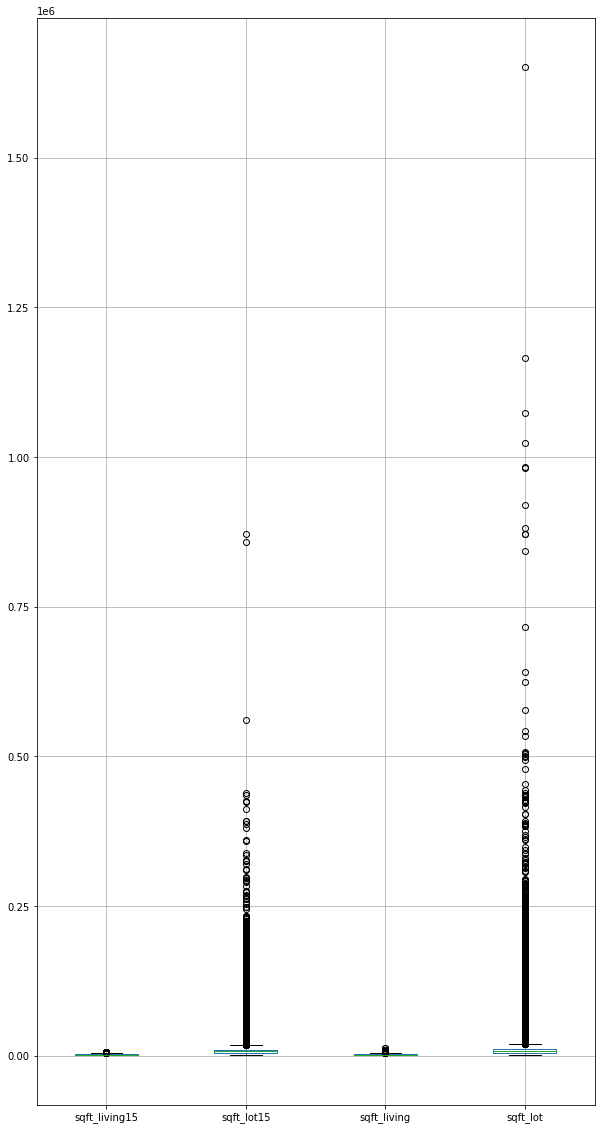

In [40]:
df3 = pd.DataFrame(df, columns = ['sqft_living15','sqft_lot15','sqft_living','sqft_lot'])  
plt.figure(figsize = (10, 20)) 
  
df3.boxplot()

In [41]:
df['floors'] = df['floors'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')
df['bedrooms'] = df['bedrooms'].astype('category')
df['bathrooms'] = df['bathrooms'].astype('category')

In [42]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
# create a label encoder object
le = LabelEncoder()

# apply label encoding to each categorical variable
df['date'] = le.fit_transform(df['date'])
df['zipcode'] = le.fit_transform(df['zipcode'])

In [43]:
df['date'] = df['date'].astype('category')
df['zipcode'] = df['zipcode'].astype('category')
df['view'] = df['view'].astype('category')

In [45]:
# Identify numerical columns with outliers
num_cols = ['sqft_living15','sqft_lot15','sqft_living','sqft_lot'] # Replace with your numerical columns

# Replace outliers with NaN
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)
    df.loc[outlier_mask, col] = float('nan')

In [46]:
from sklearn.impute import KNNImputer

In [47]:
# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

In [48]:
df

,id,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above
0,7129300520,0,1955,0,66,47.5112,-122.257,1340.0,5650.0,160,221900.0,3.0,NaN,1180.0,5650.0,NaN,0,3,7,1180
1,6414100192,400,1951,1991,55,47.7210,-122.319,1690.0,7639.0,111,538000.0,3.0,2.0,2570.0,7242.0,2.0,0,3,7,2170
2,5631500400,0,1933,0,16,47.7379,-122.233,2720.0,8062.0,298,180000.0,2.0,NaN,770.0,10000.0,NaN,0,3,6,770
3,2487200875,910,1965,0,58,47.5208,-122.393,1360.0,5000.0,111,604000.0,4.0,NaN,1960.0,5000.0,NaN,0,5,7,1050
4,1954400510,0,1987,0,37,47.6168,-122.045,1800.0,7503.0,213,510000.0,3.0,2.0,1680.0,8080.0,1.0,0,3,8,1680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21964,263000018,0,2009,0,42,47.6993,-122.346,1530.0,1509.0,252,360000.0,3.0,NaN,1530.0,1131.0,3.0,0,3,8,1530
21965,6600060120,0,2014,0,60,47.5107,-122.362,1830.0,7200.0,273,400000.0,4.0,2.0,2310.0,5813.0,2.0,0,3,8,2310
21966,1523300141,0,2009,0,59,47.5944,-122.299,1020.0,2007.0,277,402101.0,NaN,NaN,1020.0,1350.0,2.0,0,3,7,1020
21967,291310100,0,2004,0,15,47.5345,-122.069,1410.0,1287.0,189,400000.0,3.0,2.0,1600.0,2388.0,2.0,0,3,8,1600


<AxesSubplot:>

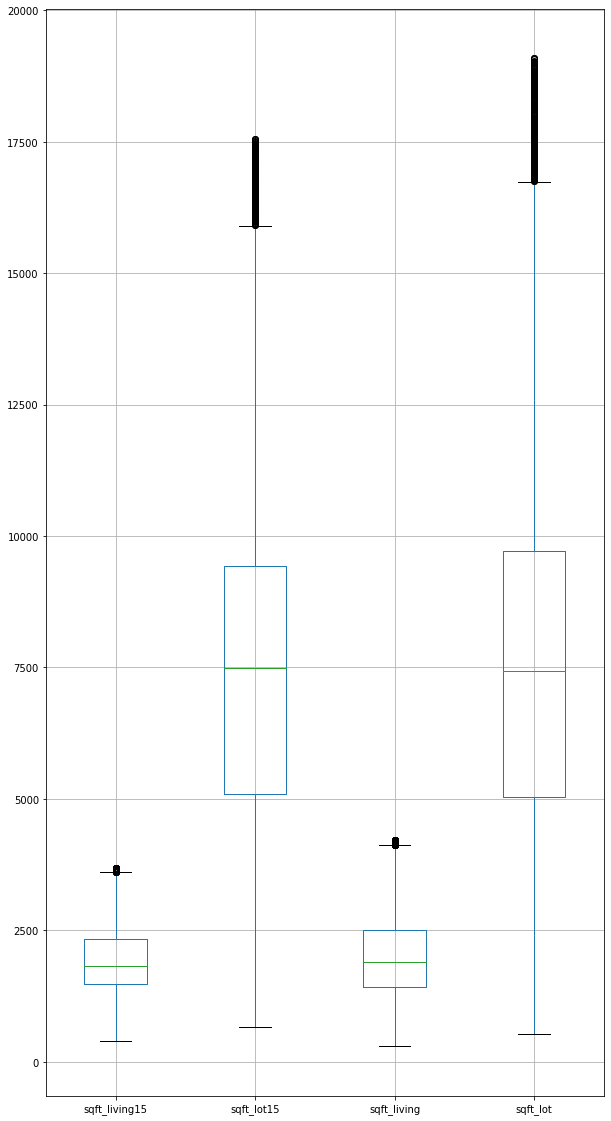

In [49]:
df3 = pd.DataFrame(df, columns = ['sqft_living15','sqft_lot15','sqft_living','sqft_lot'])  
plt.figure(figsize = (10, 20)) 
  
df3.boxplot()

In [50]:
# Impute missing values using KNN
imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])

<AxesSubplot:>

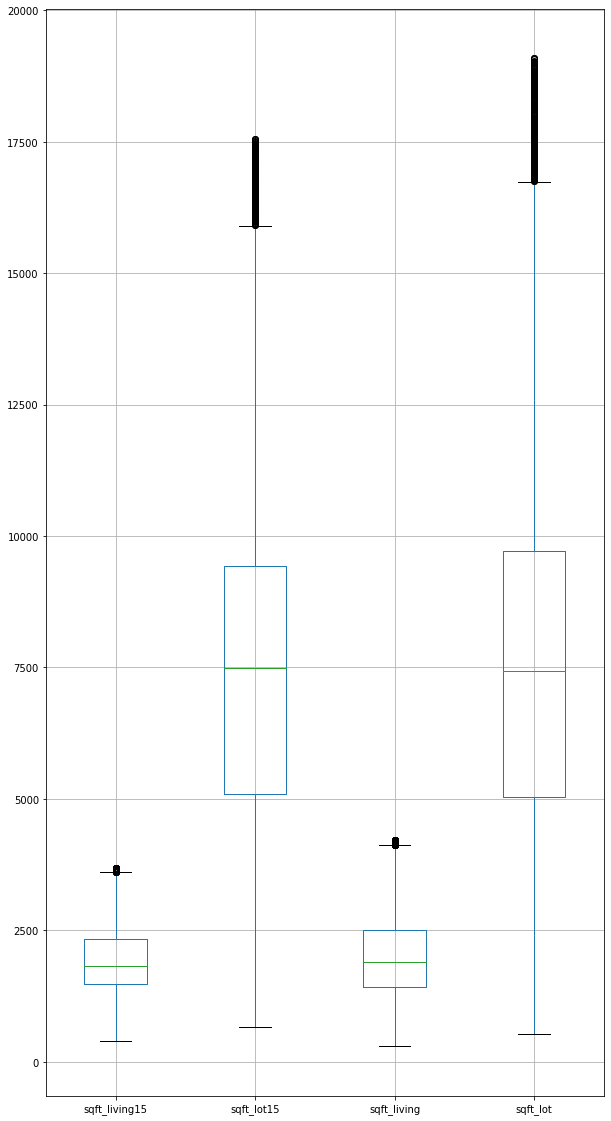

In [51]:
df3 = pd.DataFrame(df, columns = ['sqft_living15','sqft_lot15','sqft_living','sqft_lot'])  
plt.figure(figsize = (10, 20)) 
  
df3.boxplot()

In [52]:
def replace_outliers_median(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    x[x < lower_bound] = np.median(x)
    x[x > upper_bound] = np.median(x)
    return x

# Define a function to replace outliers with the mode for categorical variables
def replace_outliers_mode(x):
    mode = x.mode()[0]
    x[x != mode] = mode
    return x


In [53]:
# Apply the functions to the data
df[['sqft_living15','sqft_lot15','sqft_living','sqft_lot']] = df[['sqft_living15','sqft_lot15','sqft_living','sqft_lot']].apply(replace_outliers_median)

<AxesSubplot:>

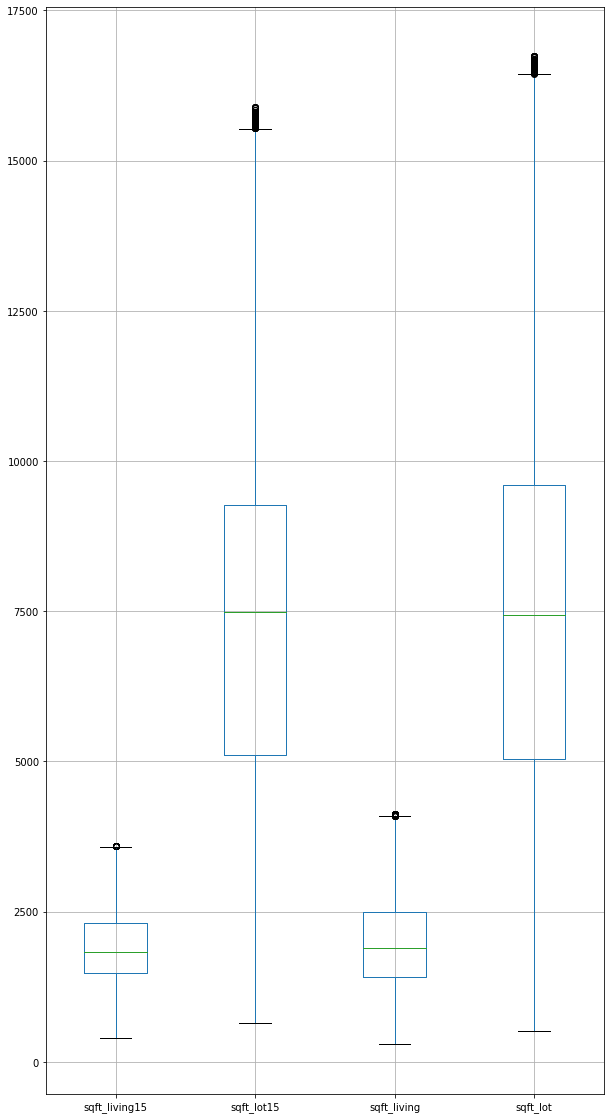

In [54]:
df3 = pd.DataFrame(df, columns = ['sqft_living15','sqft_lot15','sqft_living','sqft_lot'])  
plt.figure(figsize = (10, 20)) 
  
df3.boxplot()

In [55]:
# Apply the functions to the data
df[['sqft_living15','sqft_lot15','sqft_living','sqft_lot']] = df[['sqft_living15','sqft_lot15','sqft_living','sqft_lot']].apply(replace_outliers_median)

<AxesSubplot:>

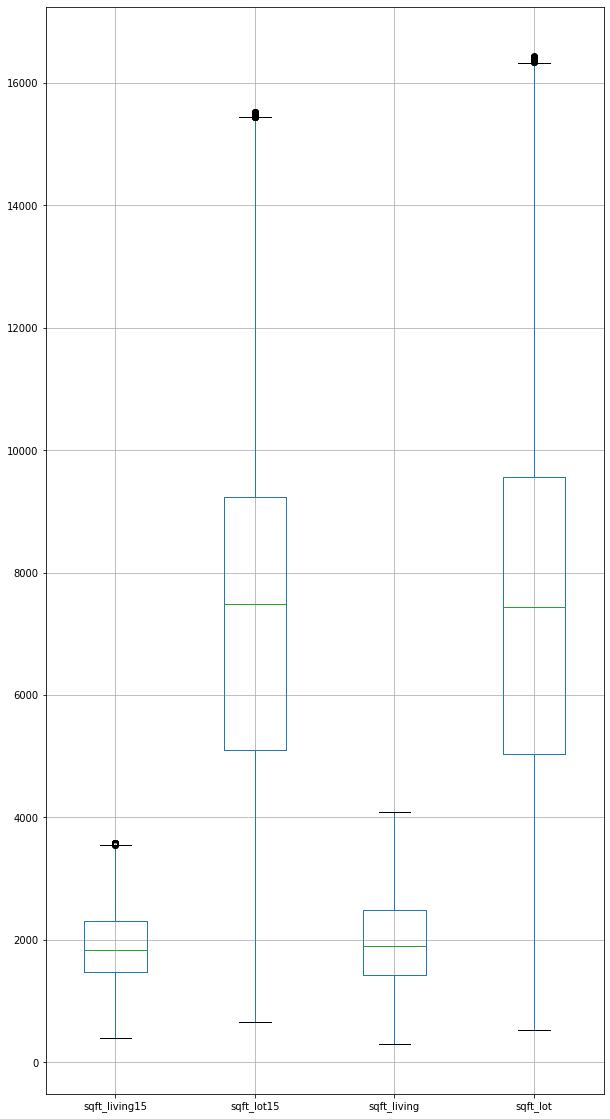

In [56]:
df3 = pd.DataFrame(df, columns = ['sqft_living15','sqft_lot15','sqft_living','sqft_lot'])  
plt.figure(figsize = (10, 20)) 
  
df3.boxplot()

In [57]:
# Apply the functions to the data
df[['sqft_living15','sqft_lot15','sqft_living','sqft_lot']] = df[['sqft_living15','sqft_lot15','sqft_living','sqft_lot']].apply(replace_outliers_median)

<AxesSubplot:>

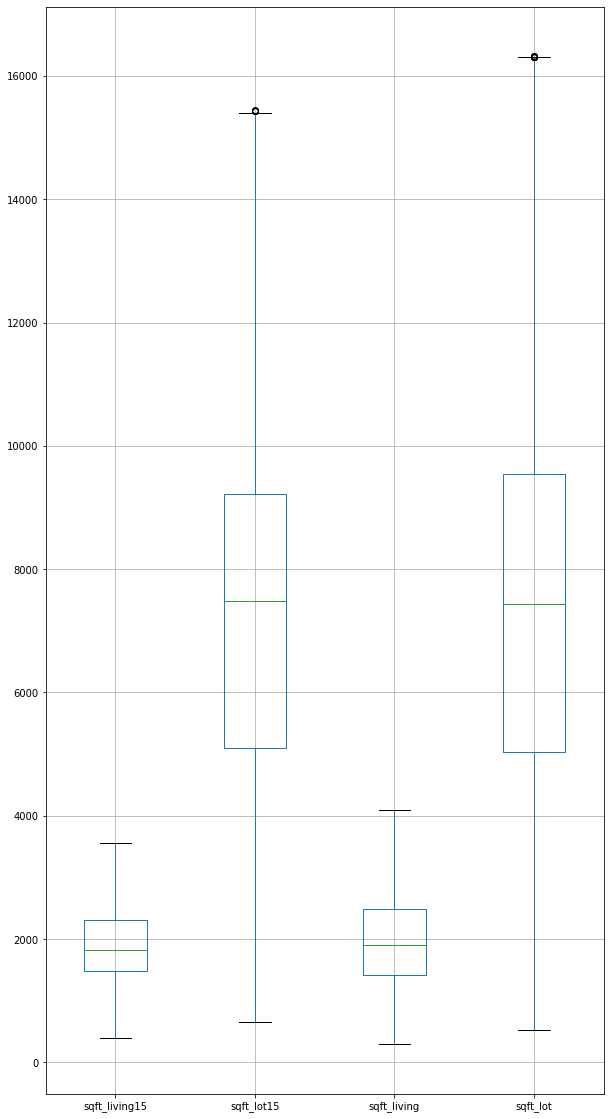

In [58]:
df3 = pd.DataFrame(df, columns = ['sqft_living15','sqft_lot15','sqft_living','sqft_lot'])  
plt.figure(figsize = (10, 20)) 
  
df3.boxplot()

In [59]:
df.isnull().sum()

id                  0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
bedrooms         6696
bathrooms        7616
sqft_living         0
sqft_lot            0
floors           4862
view                0
condition           0
grade               0
sqft_above          0
dtype: int64

In [60]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [61]:
df.isnull().sum()

id               0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
dtype: int64

In [62]:
df[df['sqft_basement'] == 0]

,id,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above
0,7.129301e+09,0.0,1955.0,0.0,66.0,47.5112,-122.257,1340.0,5650.0,160.0,221900.0,3.000000,1.333333,1180.0,5650.0,1.000000,0.0,3.0,7.0,1180.0
2,5.631500e+09,0.0,1933.0,0.0,16.0,47.7379,-122.233,2720.0,8062.0,298.0,180000.0,2.000000,2.000000,770.0,10000.0,1.333333,0.0,3.0,6.0,770.0
4,1.954401e+09,0.0,1987.0,0.0,37.0,47.6168,-122.045,1800.0,7503.0,213.0,510000.0,3.000000,2.000000,1680.0,8080.0,1.000000,0.0,3.0,8.0,1680.0
6,1.321400e+09,0.0,1995.0,0.0,2.0,47.3097,-122.327,2238.0,6819.0,326.0,257500.0,3.000000,2.000000,1715.0,6819.0,2.000000,0.0,3.0,7.0,1715.0
7,2.008000e+09,0.0,1963.0,0.0,68.0,47.4095,-122.315,1650.0,9711.0,176.0,291850.0,3.000000,2.000000,1060.0,9711.0,1.000000,0.0,3.0,7.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21964,2.630000e+08,0.0,2009.0,0.0,42.0,47.6993,-122.346,1530.0,1509.0,252.0,360000.0,3.000000,2.000000,1530.0,1131.0,3.000000,0.0,3.0,8.0,1530.0
21965,6.600060e+09,0.0,2014.0,0.0,60.0,47.5107,-122.362,1830.0,7200.0,273.0,400000.0,4.000000,2.000000,2310.0,5813.0,2.000000,0.0,3.0,8.0,2310.0
21966,1.523300e+09,0.0,2009.0,0.0,59.0,47.5944,-122.299,1020.0,2007.0,277.0,402101.0,2.333333,1.000000,1020.0,1350.0,2.000000,0.0,3.0,7.0,1020.0
21967,2.913101e+08,0.0,2004.0,0.0,15.0,47.5345,-122.069,1410.0,1287.0,189.0,400000.0,3.000000,2.000000,1600.0,2388.0,2.000000,0.0,3.0,8.0,1600.0


In [63]:
df[df['yr_renovated'] == 0]

,id,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above
0,7.129301e+09,0.0,1955.0,0.0,66.0,47.5112,-122.257,1340.000000,5650.000000,160.0,221900.0,3.000000,1.333333,1180.000000,5650.000000,1.000000,0.0,3.0,7.0,1180.0
2,5.631500e+09,0.0,1933.0,0.0,16.0,47.7379,-122.233,2720.000000,8062.000000,298.0,180000.0,2.000000,2.000000,770.000000,10000.000000,1.333333,0.0,3.0,6.0,770.0
3,2.487201e+09,910.0,1965.0,0.0,58.0,47.5208,-122.393,1360.000000,5000.000000,111.0,604000.0,4.000000,2.000000,1960.000000,5000.000000,1.666667,0.0,5.0,7.0,1050.0
4,1.954401e+09,0.0,1987.0,0.0,37.0,47.6168,-122.045,1800.000000,7503.000000,213.0,510000.0,3.000000,2.000000,1680.000000,8080.000000,1.000000,0.0,3.0,8.0,1680.0
5,7.237550e+09,1530.0,2001.0,0.0,29.0,47.6561,-122.005,1929.769661,7259.308016,141.0,1225000.0,4.000000,4.000000,1992.528322,7389.615456,1.000000,0.0,3.0,11.0,3890.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21964,2.630000e+08,0.0,2009.0,0.0,42.0,47.6993,-122.346,1530.000000,1509.000000,252.0,360000.0,3.000000,2.000000,1530.000000,1131.000000,3.000000,0.0,3.0,8.0,1530.0
21965,6.600060e+09,0.0,2014.0,0.0,60.0,47.5107,-122.362,1830.000000,7200.000000,273.0,400000.0,4.000000,2.000000,2310.000000,5813.000000,2.000000,0.0,3.0,8.0,2310.0
21966,1.523300e+09,0.0,2009.0,0.0,59.0,47.5944,-122.299,1020.000000,2007.000000,277.0,402101.0,2.333333,1.000000,1020.000000,1350.000000,2.000000,0.0,3.0,7.0,1020.0
21967,2.913101e+08,0.0,2004.0,0.0,15.0,47.5345,-122.069,1410.000000,1287.000000,189.0,400000.0,3.000000,2.000000,1600.000000,2388.000000,2.000000,0.0,3.0,8.0,1600.0


In [64]:
df = df.drop(columns=['sqft_basement'])

In [65]:
df = df.drop(columns=['yr_renovated'])

In [66]:
ContinuousCols=['yr_built','sqft_living15', 'sqft_lot15', 'sqft_living', 'sqft_lot','sqft_above','price','lat',
       'long']

In [67]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(df[ContinuousCols])

# Generating the standardized values of X
res=PredictorScalerFit.transform(df[ContinuousCols])

In [68]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(res)
res = transformer.transform(res)

In [69]:
df4 = pd.DataFrame(res, columns =['yr_built.1','sqft_living15.1', 'sqft_lot15.1', 'sqft_living.1', 'sqft_lot.1','sqft_above.1','Price','lat.1',
       'long.1'])

In [70]:
df = pd.concat([df4.reset_index(drop=True), df.reset_index(drop=True)], axis=1)

In [71]:
delete_cols = ['yr_built','sqft_living15', 'sqft_lot15', 'sqft_living', 'sqft_lot','sqft_above','price','lat',
       'long']

df = df.drop(columns=delete_cols)

In [72]:
df

,yr_built.1,sqft_living15.1,sqft_lot15.1,sqft_living.1,sqft_lot.1,sqft_above.1,Price,lat.1,long.1,id,zipcode,date,bedrooms,bathrooms,floors,view,condition,grade
0,-0.422222,-0.590361,-0.444024,-0.672897,-0.397407,-0.376238,-0.710592,-0.289296,-0.128079,7.129301e+09,66.0,160.0,3.000000,1.333333,1.000000,0.0,3.0,7.0
1,-0.511111,-0.168675,0.038158,0.626168,-0.043959,0.603960,0.274143,0.722276,-0.433498,6.414100e+09,55.0,111.0,3.000000,2.000000,2.000000,0.0,3.0,7.0
2,-0.911111,1.072289,0.140703,-1.056075,0.568358,-0.782178,-0.841121,0.803761,-0.009852,5.631500e+09,16.0,298.0,2.000000,2.000000,1.333333,0.0,3.0,6.0
3,-0.200000,-0.566265,-0.601600,0.056075,-0.541717,-0.504950,0.479751,-0.243009,-0.798030,2.487201e+09,58.0,111.0,4.000000,2.000000,1.666667,0.0,5.0,7.0
4,0.288889,-0.036145,0.005188,-0.205607,0.142090,0.118812,0.186916,0.219865,0.916256,1.954401e+09,37.0,213.0,3.000000,2.000000,1.000000,0.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21964,0.777778,-0.361446,-1.447903,-0.345794,-1.400693,-0.029703,-0.280374,0.617647,-0.566502,2.630000e+08,42.0,252.0,3.000000,2.000000,3.000000,0.0,3.0,8.0
21965,0.888889,0.000000,-0.068267,0.383178,-0.361218,0.742574,-0.155763,-0.291707,-0.645320,6.600060e+09,60.0,273.0,4.000000,2.000000,2.000000,0.0,3.0,8.0
21966,0.777778,-0.975904,-1.327176,-0.822430,-1.352071,-0.534653,-0.149218,0.111861,-0.334975,1.523300e+09,59.0,277.0,2.333333,1.000000,2.000000,0.0,3.0,7.0
21967,0.666667,-0.506024,-1.501721,-0.280374,-1.121620,0.039604,-0.155763,-0.176953,0.798030,2.913101e+08,15.0,189.0,3.000000,2.000000,2.000000,0.0,3.0,8.0


In [73]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [74]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['floors', 'condition', 'grade','bedrooms','bathrooms',
       'zipcode','date']
FunctionAnova(inpData=df, 
              TargetVariable='Price', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

floors is correlated with Price | P-Value: 0.0
condition is correlated with Price | P-Value: 5.081179640291452e-34
grade is correlated with Price | P-Value: 0.0
bedrooms is correlated with Price | P-Value: 0.0
bathrooms is correlated with Price | P-Value: 0.0
zipcode is correlated with Price | P-Value: 0.0
date is correlated with Price | P-Value: 0.0035957946535254194


['floors', 'condition', 'grade', 'bedrooms', 'bathrooms', 'zipcode', 'date']

In [75]:
# Calculating correlation matrix
ContinuousCols=['yr_built.1','sqft_living15.1', 'sqft_lot15.1', 'sqft_living.1', 'sqft_lot.1','sqft_above.1','Price','lat.1',
       'long.1']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,yr_built.1,sqft_living15.1,sqft_lot15.1,sqft_living.1,sqft_lot.1,sqft_above.1,Price,lat.1,long.1
yr_built.1,1.000000,0.325486,0.011441,0.327648,-0.008625,0.425976,0.057935,-0.147164,0.410990
sqft_living15.1,0.325486,1.000000,0.327030,0.714367,0.311950,0.635039,0.463917,0.038361,0.331451
sqft_lot15.1,0.011441,0.327030,1.000000,0.254624,0.836708,0.227390,0.106671,-0.113301,0.264010
sqft_living.1,0.327648,0.714367,0.254624,1.000000,0.270045,0.755125,0.517027,0.044198,0.245843
sqft_lot.1,-0.008625,0.311950,0.836708,0.270045,1.000000,0.241276,0.110688,-0.120527,0.263018
sqft_above.1,0.425976,0.635039,0.227390,0.755125,0.241276,1.000000,0.606576,0.000839,0.345181
Price,0.057935,0.463917,0.106671,0.517027,0.110688,0.606576,1.000000,0.308193,0.024889
lat.1,-0.147164,0.038361,-0.113301,0.044198,-0.120527,0.000839,0.308193,1.000000,-0.133808
long.1,0.410990,0.331451,0.264010,0.245843,0.263018,0.345181,0.024889,-0.133808,1.000000


In [76]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.3 ]

sqft_living15.1    0.463917
sqft_living.1      0.517027
sqft_above.1       0.606576
Price              1.000000
lat.1              0.308193
Name: Price, dtype: float64

In [77]:
SelectedColumns=['sqft_living15.1','sqft_living.1','sqft_above.1', 'lat.1','floors', 'condition', 'grade','bathrooms', 'bedrooms', 'date','Price']

# Selecting final columns
df=df[SelectedColumns]
df.head()

,sqft_living15.1,sqft_living.1,sqft_above.1,lat.1,floors,condition,grade,bathrooms,bedrooms,date,Price
0,-0.590361,-0.672897,-0.376238,-0.289296,1.000000,3.0,7.0,1.333333,3.0,160.0,-0.710592
1,-0.168675,0.626168,0.603960,0.722276,2.000000,3.0,7.0,2.000000,3.0,111.0,0.274143
2,1.072289,-1.056075,-0.782178,0.803761,1.333333,3.0,6.0,2.000000,2.0,298.0,-0.841121
3,-0.566265,0.056075,-0.504950,-0.243009,1.666667,5.0,7.0,2.000000,4.0,111.0,0.479751
4,-0.036145,-0.205607,0.118812,0.219865,1.000000,3.0,8.0,2.000000,3.0,213.0,0.186916


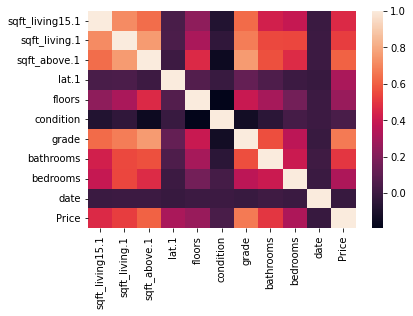

In [78]:
 
  
# plotting correlation heatmap
dataplot=sns.heatmap(df.corr())
  
# displaying heatmap
plt.show()

In [79]:
df = df.drop(columns=['sqft_living15.1'])

In [80]:
df3 = df.sample(frac = 1)

In [81]:
X = np.array(df3.drop(["Price"],1))
print("Shape of X:",X.shape)
print(X)

Shape of X: (21969, 9)
[[ 1.11214953e+00  1.51485149e+00 -5.39054966e-01 ...  4.00000000e+00
   5.00000000e+00  3.28000000e+02]
 [ 4.80373832e-01  8.45544554e-01 -1.28543877e+00 ...  3.00000000e+00
   2.66666667e+00  1.30000000e+02]
 [ 9.62616822e-01  1.35643564e+00 -2.64223722e-01 ...  2.00000000e+00
   4.00000000e+00  2.00000000e+02]
 ...
 [ 9.34579439e-02 -1.68316832e-01 -1.20973963e+00 ...  2.00000000e+00
   3.00000000e+00  1.09000000e+02]
 [ 7.66355140e-01 -4.95049505e-02  2.30954677e-01 ...  1.66666667e+00
   4.00000000e+00  2.30000000e+01]
 [-5.70093458e-01 -2.67326733e-01  4.32497589e-01 ...  2.00000000e+00
   3.00000000e+00  6.90000000e+01]]


In [82]:
y = np.array(df3["Price"])
print("Shape of y:",y.shape)
print(y)

Shape of y: (21969,)
[ 0.31464174 -0.49221184  0.57632399 ... -0.35825545  0.31137072
  0.        ]


In [83]:
size = X.shape[0]
X_train = X[:int(0.7 * size),:]
X_test = X[int(0.7 * size):,:]
y_train = y[:int(0.7 * size)]
y_test = y[int(0.7 * size):]

In [84]:

#Standardizing the X_train and X_test daatsets
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu ) / sigma

#We use the same mean and SD as the one of X_train as we dont know the mean of X_test
X_test = (X_test - mu ) / sigma

#Standardizing the y_train data
mu_y = np.mean(y_train, 0)
sigma_y = np.std(y_train, 0, ddof = 0)

y_train = (y_train - mu_y ) / sigma_y

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(15378, 9)
(6591, 9)
(15378,)
(6591,)


In [86]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
y_pred = np.zeros(y_test.shape)
y_train.shape, y_test.shape,y_pred.shape

((15378, 1), (6591, 1), (6591, 1))

In [87]:
n_neigh = 13
for row in range(len(X_test)):
    euclidian_distance = np.sqrt(np.sum((X_train - X_test[row])**2, axis = 1 ))
    y_pred[row] = np.mean(y_train[np.argsort(euclidian_distance, axis = 0)[:n_neigh]])* sigma_y + mu_y
    
#Finding the root mean squared error 

RMSE = np.sqrt(np.mean((y_pred - y_test)**2))
print(RMSE)

0.6398365821778271


In [88]:
# Calculate mean absolute error
mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.3405292652482746


In [89]:
# We are setting a range of K values and calculating the RMSE for each of them. This way we can chose the optimal K value
k_list = [x for x in range(1,50,1)]

# Calculating the distance matrix using numpy broadcasting technique 
distance = np.sqrt(((X_train[:, :, None] - X_test[:, :, None].T) ** 2).sum(1))

#Sorting each data points of the distance matrix to reduce computational effort 
sorted_distance = np.argsort(distance, axis = 0)

#The knn function takes in the sorted distance and returns the RMSE of the 
def knn(X_train,X_test,y_train,y_test,sorted_distance,k):
    y_pred = np.zeros(y_test.shape)
    for row in range(len(X_test)):
        
        #Transforming the y_train values to adjust the scale. 
        y_pred[row] = np.mean(y_train[sorted_distance[:,row][:k]])* sigma_y + mu_y

    RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
    return RMSE

#Storing the RMSE values in a list for each k value 
rmse_list = []
for i in k_list:
    rmse_list.append(knn(X_train,X_test,y_train,y_test,sorted_distance,i))

In [90]:
#Finding the optimal K value
min_rmse_k_value = k_list[rmse_list.index(min(rmse_list))]

#Finding the lowest possible RMSE
optimal_RMSE = knn(X_train,X_test,y_train,y_test,sorted_distance,min_rmse_k_value)
optimal_RMSE

0.6356683865502168

In [91]:
min_rmse_k_value

11

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error

print(np.sqrt(mean_squared_error(y_test,y_pred))) 
r2scr = print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.6398365821778271
0.6757783971298923
0.3405292652482746


In [93]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)


In [94]:
from sklearn.model_selection import GridSearchCV
param={'n_neighbors': range(1,50)}
grid_kn=GridSearchCV(estimator=RegModel,param_grid=param,scoring='neg_mean_squared_error',cv=5,verbose=1,n_jobs=-1)
grid_kn.fit(X_train,y_train)
print('Best K For Model is: ',grid_kn.best_params_)
print('Best Score is: ',grid_kn.best_score_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Best K For Model is:  {'n_neighbors': 14}
Best Score is:  -0.33406608638843444


In [95]:
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

In [96]:
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

R2 Value: 0.8161295219095841
